<a href="https://colab.research.google.com/github/cibelerusso/IntroducaoaInferenciaEstatistica/blob/main/Notebooks/Fun%C3%A7%C3%A3o_poder_do_teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Função poder do teste

### SME0221 Introdução à Inferência Estatística
### por Cibele Russo

#### ICMC/USP - São Carlos SP

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


In [ ]:
def power_function(mu0, mu1, sigma, alpha, sample_sizes):
    power_values = []

    for n in sample_sizes:
        critical_value = stats.norm.ppf(1 - alpha/2)
        std_error = sigma / np.sqrt(n)
        rejection_region = critical_value * std_error
        beta = stats.norm.cdf(rejection_region, loc=mu1, scale=std_error)
        power = 1 - beta
        power_values.append(power)

    return power_values


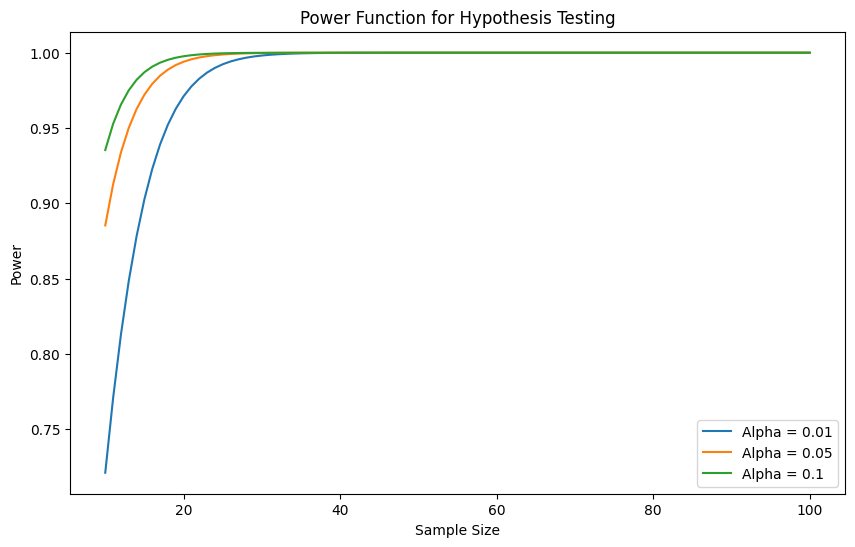

In [ ]:
# Parameters
mu0 = 0  # Mean under null hypothesis
mu1 = 1  # Mean under alternative hypothesis
sigma = 1  # Standard deviation (assumed equal for both cases)
alpha_values = [0.01, 0.05, 0.1]  # Significance levels
sample_sizes = range(10, 101, 1)  # Sample sizes

# Calculate power values for different scenarios
power_results = []
for alpha in alpha_values:
    power = power_function(mu0, mu1, sigma, alpha, sample_sizes)
    power_results.append(power)

# Plot the power function
plt.figure(figsize=(10, 6))
for i, alpha in enumerate(alpha_values):
    plt.plot(sample_sizes, power_results[i], label='Alpha = {}'.format(alpha))
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.title('Power Function for Hypothesis Testing')
plt.legend()
plt.show()